# Determinação de função de precificação para suporte a tomada de decisão

In [ ]:
# !pip install pandas
# !pip install numpy

In [ ]:
import random
from math import *
import pandas as pd
import numpy as np

In [ ]:
# Parâmetros
# t: tempo (horas)
# c: custo total
# k: parâmetro da função
# p: parâmetro da função 2
# a:parâmetro da função 3 

# Variável de decisão
# x: nível de dificuldade do projeto

## Testes para modelagem da função

In [ ]:
# Constantes
hora_consultor = 10
horas_dia = 2

In [ ]:
# Parâmetros do preço
def param():
    tempo = random.randint(horas_dia * 4 * 20, horas_dia * 4 * 40)
    dificuldade = random.randint(1, 1000) / 1000
    custo_total = random.randint(500, 2000)
    return [custo_total, tempo, dificuldade]

In [ ]:
def preco(hora_consultor, k=9, p=1, a=5):
    parametros = param()
    x = parametros[2]
    h = hora_consultor
    t = parametros[1]
    c = parametros[0]
    
    return [(1 / (p + exp(-k * x + a)) + 1) * c + (1 / (p + exp(-k * x + a)) + 1) * h * t, 
            parametros[0], parametros[1], parametros[2], (1 / (p + exp(-k * x + a)) + 1)]

## Análise dos resultados

In [ ]:
def main():
    precos = []
    for i in range(1000):
        precos.append(preco(hora_consultor))
    
    precos = pd.DataFrame(precos)
    precos = precos.rename(columns={0: 'Preco', 1: 'Custo total', 2: 'Tempo', 3: 'Dificuldade', 4: 'Fator mult'})
    
    return precos

In [ ]:
df = main()

In [ ]:
df.head()

,Preco,Custo total,Tempo,Dificuldade,Fator mult
0,4429.294396,1249,233,0.426,1.237579
1,6904.631061,792,284,0.801,1.901055
2,3391.406619,1126,223,0.051,1.010550
3,6542.693888,1282,210,0.851,1.934564
4,3788.388438,1122,252,0.203,1.040195


In [ ]:
df.corr()

,Preco,Custo total,Tempo,Dificuldade,Fator mult
Preco,1.000000,0.357587,0.365539,0.807585,0.827984
Custo total,0.357587,1.000000,-0.052383,0.004394,0.003940
Tempo,0.365539,-0.052383,1.000000,-0.031784,-0.030649
Dificuldade,0.807585,0.004394,-0.031784,1.000000,0.975821
Fator mult,0.827984,0.003940,-0.030649,0.975821,1.000000


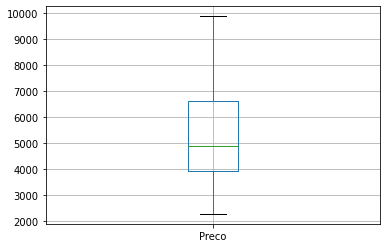

In [ ]:
# Boxplot
boxplot = df.boxplot(column=['Preco'])
boxplot

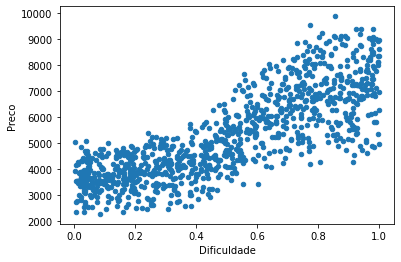

In [ ]:
# Scatter
df.plot.scatter(x = 'Dificuldade', y = 'Preco')

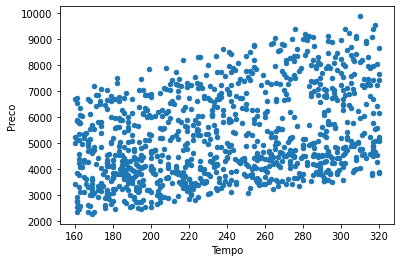

In [ ]:
df.plot.scatter(x = 'Tempo', y = 'Preco')

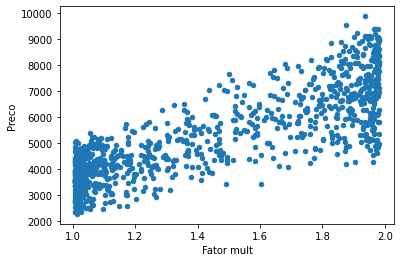

In [ ]:
df.plot.scatter(x = 'Fator mult', y = 'Preco')

## Função

In [ ]:
# Parâmetros do projeto
numero_consultores = 4  # Número de consultores no projeto
hora_consultor = 30  # Valor pago por hora de trabalho do consultor, em R$
dias_total = 20  # Duração do projeto em dias
horas_dia = 2  # Disponibilidade de horas para trabalhar por dia
dificuldade = 0.5  # Nível de dificuldade do projeto, valor de 0 a 1
custo = 2000  # Custo do projeto, excluindo despesas com mão-de-obra

In [ ]:
# Parâmetros da função
k = 9
p = 1
a = 5

In [ ]:
def param():
    tempo = horas_dia * dias_total * numero_consultores   # Total de horas trabalhadas no projeto
    return [dificuldade, custo, tempo, hora_consultor]

In [ ]:
def preco(k=k, p=p, a=a):
    parametros = param()
    x = parametros[0]  # Dificuldade (float 0 a 1)
    c = parametros[1]  # Custo total (R$)
    t = parametros[2]  # Tempo total de projeto (horas)
    h = parametros[3]  # Custo hora/consultor (R$)
    
    return [(1 / (p + exp(-k * x + a)) + 1) * c + (1 / (p + exp(-k * x + a)) + 1) * h * t, (1 / (p + exp(-k * x + a)) + 1) * c]

In [ ]:
print('Preço estimado do projeto: R$ {:.2f}, R$ {:.2f}'.format(preco()[0], preco()[1]))

Preço estimado do projeto: R$ 9367.28, R$ 2755.08
